# Pose Landmarks Detection with MediaPipe Tasks

This notebook shows you how to use MediaPipe Tasks Python API to detect pose landmarks from images.

- [Code reference](https://mediapipe-studio.webapps.google.com/studio/demo/pose_landmarker)

## Preparation

Let's start with installing MediaPipe.


In [ ]:
!pip install -q mediapipe

Then download an off-the-shelf model bundle. Check out the [MediaPipe documentation](https://developers.google.com/mediapipe/solutions/vision/pose_landmarker#models) for more information about this model bundle.

In [2]:
!wget -O pose_landmarker.task -q https://storage.googleapis.com/mediapipe-models/pose_landmarker/pose_landmarker_heavy/float16/1/pose_landmarker_heavy.task

'wget' is not recognized as an internal or external command,
operable program or batch file.


## Visualization utilities

In [1]:
# @markdown To better demonstrate the Pose Landmarker API, we have created a set of visualization tools that will be used in this colab. These will draw the landmarks on a detect person, as well as the expected connections between those markers.

from mediapipe import solutions
from mediapipe.framework.formats import landmark_pb2
import numpy as np


def draw_landmarks_on_image(rgb_image, detection_result):
    pose_landmarks_list = detection_result.pose_landmarks
    annotated_image = np.copy(rgb_image)

    # Loop through the detected poses to visualize.
    for idx in range(len(pose_landmarks_list)):
        pose_landmarks = pose_landmarks_list[idx]

        # Draw the pose landmarks.
        pose_landmarks_proto = landmark_pb2.NormalizedLandmarkList()
        pose_landmarks_proto.landmark.extend(
            [
                landmark_pb2.NormalizedLandmark(
                    x=landmark.x, y=landmark.y, z=landmark.z
                )
                for landmark in pose_landmarks
            ]
        )
        solutions.drawing_utils.draw_landmarks(
            annotated_image,
            pose_landmarks_proto,
            solutions.pose.POSE_CONNECTIONS,
            solutions.drawing_styles.get_default_pose_landmarks_style(),
        )
    return annotated_image


2024-04-12 20:18:09.633455: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Download test image

To demonstrate the Pose Landmarker API, you can download a sample image using the follow code. The image is from [Pixabay](https://pixabay.com/photos/girl-woman-fitness-beautiful-smile-4051811/).

In [3]:
!wget -q -O image.jpg https://cdn.pixabay.com/photo/2023/10/04/14/15/man-8293794_960_720.jpg

import cv2
img = cv2.imread("image.jpg")

Optionally, you can upload your own image. If you want to do so, uncomment and run the cell below.

## Running inference and visualizing the results

The final step is to run pose landmark detection on your selected image. This involves creating your PoseLandmarker object, loading your image, running detection, and finally, the optional step of displaying the image with visualizations.

Check out the [MediaPipe documentation](https://developers.google.com/mediapipe/solutions/vision/pose_landmarker/python) to learn more about configuration options that this solution supports.


In [ ]:
# STEP 1: Import the necessary modules.
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision
import matplotlib.pyplot as plt
import cv2

# 建立姿勢偵測物件
base_options = python.BaseOptions(model_asset_path='./models/pose_landmarker.task')
options = vision.PoseLandmarkerOptions(
    base_options=base_options,
    output_segmentation_masks=True)
detector = vision.PoseLandmarker.create_from_options(options)

# 載入影像
image = cv2.imread("./image.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = mp.Image(image_format=mp.ImageFormat.SRGB, data=image)
# image = mp.Image.create_from_file("test.jpg")

# 取得姿勢偵測結果(輸入影像必為RGB順序)
detection_result = detector.detect(image)

# 根據姿勢偵測結果，標記身體節點和骨架
annotated_image = draw_landmarks_on_image(image.numpy_view(), detection_result)
plt.figure(figsize=[10, 10])
plt.imshow(annotated_image)
plt.axis("off")

Visualize the pose segmentation mask.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


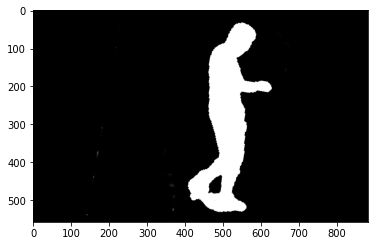

In [26]:
segmentation_mask = detection_result.segmentation_masks[0].numpy_view()
visualized_mask = np.repeat(segmentation_mask[:, :, np.newaxis], 3, axis=2) * 255
plt.imshow(cv2.cvtColor(visualized_mask, cv2.COLOR_BGR2RGB))